In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from networkx.utils.random_sequence import cumulative_distribution


## Calculation and graphic work in Statistics

## Part 1

In [26]:
values = np.array([0.63, 0.74, 2.44, 0.27, 2.46, 2.41, 0.77, 4.78, 1.58, 0.15,0.02, 1.67, 1.93, 0.37, 0.82, 0.05, 2.34, 0.19, 3.23, 1.62, 2.41, 0.18, 0.1 , 0.75, 1.97, 2.4 , 0.06, 4.81, 0.87, 2.05,0.32, 0.46, 1.47, 0.08, 0.23, 3.94, 0.57, 0.32, 1.89, 2.45,0.27, 2.51, 0.17, 0.04, 0.57, 2.44, 1.05, 5.69, 0.47, 0.59,0.64, 2.09, 1.61, 0.29, 0.82, 1.82, 0.03, 0.78, 0.36, 0.52,0.09, 1.59, 0.46, 1.17, 0.74, 0.11, 1.51, 2.33, 0.58, 0.11,1.97, 0.06, 0.35, 0.25, 0.61, 0.22, 0.79, 1.59, 3.54, 0.62,0.67, 1.57, 0.47, 0.3 , 0.05, 2.09, 0.23, 1.91, 1.5 , 0.35,1.48, 2.75, 1.43, 2.54, 1.45, 1.38, 0.23, 0.81, 1.19, 1.39])

values = np.sort(values)

values


array([1.  , 1.  , 1.01, 1.01, 1.01, 1.01, 1.02, 1.02, 1.02, 1.02, 1.03,
       1.03, 1.03, 1.03, 1.03, 1.03, 1.03, 1.04, 1.04, 1.04, 1.04, 1.05,
       1.05, 1.06, 1.06, 1.06, 1.06, 1.06, 1.07, 1.08, 1.08, 1.08, 1.08,
       1.09, 1.11, 1.11, 1.11, 1.13, 1.13, 1.13, 1.13, 1.13, 1.13, 1.14,
       1.14, 1.14, 1.15, 1.15, 1.16, 1.17, 1.18, 1.18, 1.18, 1.18, 1.18,
       1.18, 1.19, 1.19, 1.19, 1.2 , 1.2 , 1.21, 1.21, 1.21, 1.21, 1.22,
       1.22, 1.23, 1.23, 1.23, 1.23, 1.24, 1.24, 1.24, 1.25, 1.25, 1.27,
       1.27, 1.28, 1.29, 1.29, 1.32, 1.33, 1.33, 1.36, 1.37, 1.38, 1.39,
       1.39, 1.4 , 1.43, 1.44, 1.48, 1.51, 1.52, 1.52, 1.53, 1.61, 1.73,
       2.16])

In [27]:
# plt.plot(scalex = values)
# plt.show()

In [28]:
bin_num = 1 + np.floor(np.log2(len(values)))
bin_len = np.round((values[-1] - values[0])/bin_num,2 )

bins = np.arange(0, np.ceil(values[-1]), bin_len)
#TODO last value does nto fit in a range
bins[-1] = bins[-1] + 0.1
frequencies, bin_edges = np.histogram(values, bins=bins)
bin_edges = np.round(bin_edges, 2)
middle = [np.round((bin_edges[i] + bin_edges[i +1])/2, 2 )for i in range(len(bin_edges) -1)]
cum_freq = np.cumsum(frequencies)
rel_freq = frequencies/len(values)
cum_real_freq = np.cumsum(rel_freq)
print(bin_edges)

[1.   1.17 1.34 1.51 1.68 1.85 2.02 2.19 2.36 2.53 2.7  2.97]


In [29]:
df = pd.DataFrame({
    'Bins': [f"{bin_edges[i]} - {bin_edges[i+1]}" for i in range(len(bin_edges) -1)],
    'Bin_Middle': middle,
    'Frequency': frequencies,
    'Cumulative_Frequency': cum_freq,
    'Relative_Frequency': rel_freq,
    'Cumulative_Relative_suFrequency': cum_real_freq
})
df

,Bins,Bin_Middle,Frequency,Cumulative_Frequency,Relative_Frequency,Cumulative_Relative_suFrequency
0,1.0 - 1.17,1.08,49,49,0.49,0.49
1,1.17 - 1.34,1.25,35,84,0.35,0.84
2,1.34 - 1.51,1.42,9,93,0.09,0.93
3,1.51 - 1.68,1.60,5,98,0.05,0.98
4,1.68 - 1.85,1.76,1,99,0.01,0.99
5,1.85 - 2.02,1.94,0,99,0.00,0.99
6,2.02 - 2.19,2.10,1,100,0.01,1.00
7,2.19 - 2.36,2.28,0,100,0.00,1.00
8,2.36 - 2.53,2.44,0,100,0.00,1.00
9,2.53 - 2.7,2.62,0,100,0.00,1.00


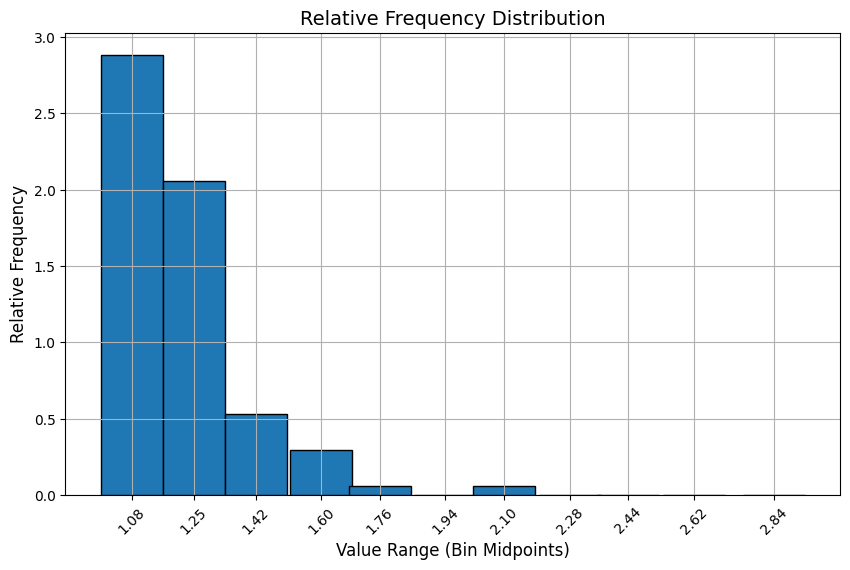

In [30]:
plt.figure(figsize=(10, 6))

corrected_rel_freq = rel_freq/bin_len
plt.bar(middle, corrected_rel_freq, width=bin_len, align='center', edgecolor='black')

plt.title('Relative Frequency Distribution', fontsize=14)
plt.xlabel('Value Range (Bin Midpoints)', fontsize=12)
plt.ylabel('Relative Frequency', fontsize=12)
plt.xticks(middle, rotation=45)
plt.grid(True)
plt.show()

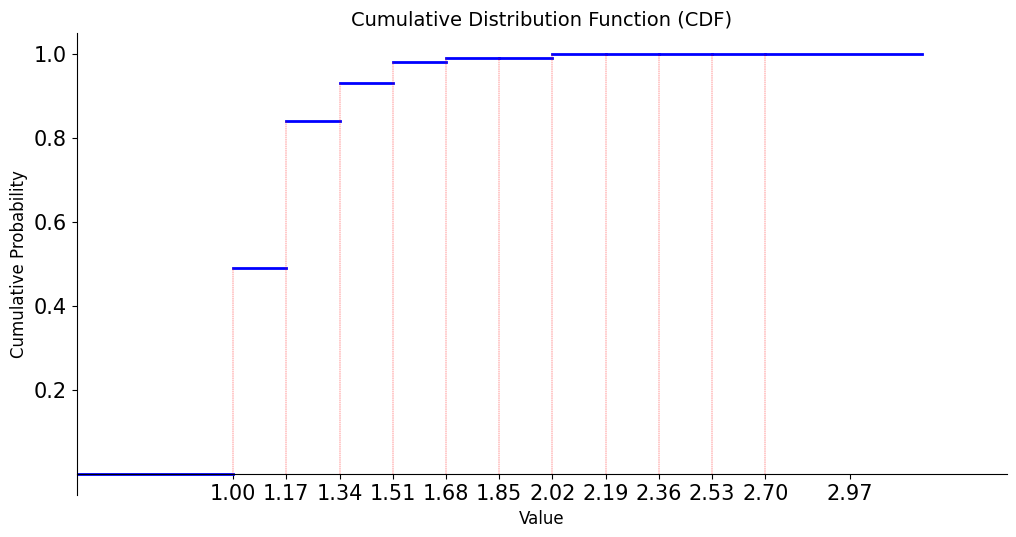

In [31]:
import numpy as np
import matplotlib.pyplot as plt

cdf = cum_freq /len(values)

def plot_empirical_cdf(x_sample, y_sample):

    plt.plot([x_sample[0] - 0.5, x_sample[0]], [0, 0], linewidth=2, color='b')
    for i in range(len(x_sample)-1):
        plt.plot([x_sample[i], x_sample[i + 1]], [y_sample[i], y_sample[i]], linewidth=2, color='b')
        plt.vlines(x_sample[i], ymin=0, ymax=y_sample[i], linewidth=0.3, color='r', linestyles='dashed')

    plt.plot([x_sample[len(x_sample)-1], x_sample[len(x_sample)-1] + 0.5], [1, 1], linewidth=2, color='b')
    
    plt.vlines(x_sample.max(), ymin=0, ymax=1, linewidth=0.3, color='r', linestyles='dashed')
    plt.title('Cumulative Distribution Function (CDF)', fontsize=14)
    plt.xlabel('Value', fontsize=12)
    plt.ylabel('Cumulative Probability', fontsize=12)
    plt.show()

fig, ax = plt.subplots(figsize=(12, 6))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position('zero')
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.set_xlim(bin_edges[0] - 0.5, bin_edges[-1] + 0.5)
ax.set_xticks(bin_edges)
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1])

plot_empirical_cdf(bin_edges[:-1], cdf)
plt.show()


## Task2


In [32]:
# mple mean, sample median, sample mode½ sample variance, unbiased sample
#variance, sample skewness and kurtosis.
mean = np.mean(values)
median = np.median(values)
var = np.var(values)
unbiased_var = np.var(values, ddof=1)

In [33]:
sample_mean_grouped =sum(df['Bin_Middle'] * df['Relative_Frequency']) 
sample_median_grouped = (values[int(np.floor(len(values)/ 2))] + values[int(np.ceil(len(values)/ 2))]) /2 if len(values) % 2 == 0 else values[int(len(values)/2)]


In [34]:
n = len(values)
median_position = n / 2
median_class_index = np.where(df['Cumulative_Frequency'] >= median_position)[0][0] 
y_me_minus_1 = bin_edges[median_class_index]  
n_me = df['Frequency'][median_class_index]
n_me_minus_1 = df['Frequency'][median_class_index - 1] if median_class_index > 0 else 0
sample_median_grouped = y_me_minus_1 + bin_len * (median_position - n_me_minus_1) / n_me


In [35]:
mode_position = df['Frequency'].idxmax()
y_mo_minus_1 = bin_edges[median_class_index]
n_mo = df['Frequency'][median_class_index]
n_mo_minus_1 =  df['Frequency'][median_class_index - 1] if median_class_index > 0 else 0
n_mo_plus_1 = df['Frequency'][median_class_index + 1]
sample_mode_grouped = y_mo_minus_1 + bin_len * ((n_mo - n_mo_minus_1) / (2*n_mo - n_mo_minus_1 -n_mo_plus_1))



## variance

In [36]:
var = np.var(values)
sample_variance_grouped = np.sum(df['Relative_Frequency'] * ((df['Bin_Middle'] - sample_mean_grouped) **2))
unbiased_var = np.var(values, ddof=1)
unbiased_variance_grouped = len(values) / (len(values) -1)* sample_variance_grouped
unbiased_variance_grouped

np.float64(0.0316680707070707)

## measure of shape


In [37]:
sample_skewness = stats.skew(values)
sample_kurtosis = stats.kurtosis(values)
sample_kurtosis

np.float64(7.224101347755553)

In [38]:
sample_skewness

np.float64(2.0937763581752016)

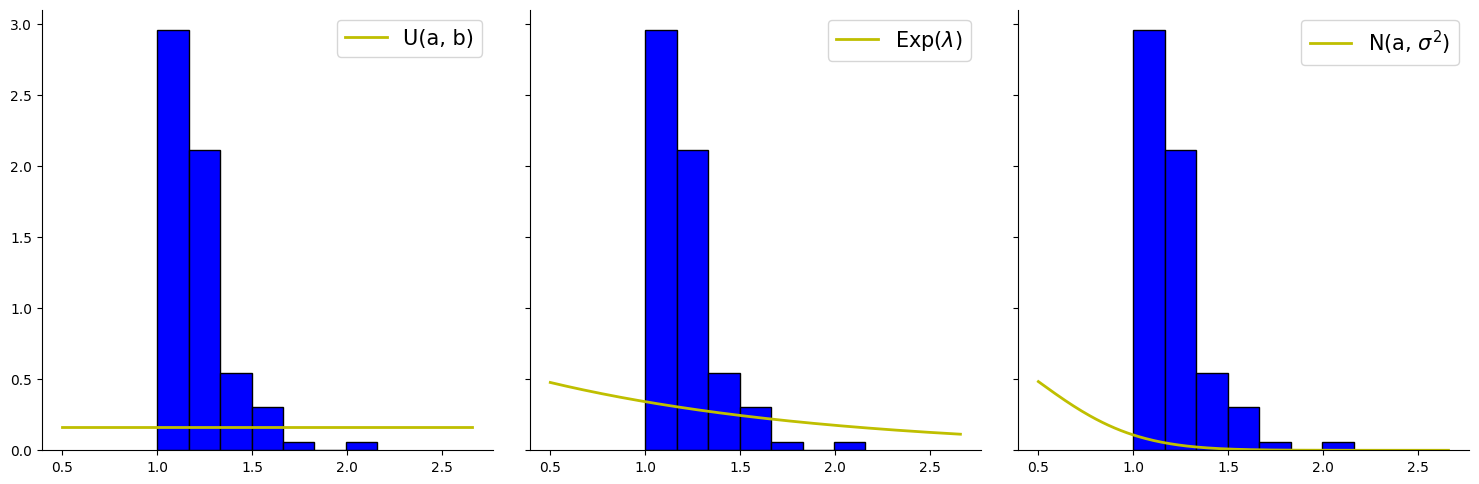

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)
fig.tight_layout()
for i in range(3):
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    # ax[i].spines['left'].set_position('zero')
    ax[i].spines['bottom'].set_position('zero')

x = np.linspace(min(list(values)) - 0.5, max(list(values)) + 0.5, num=200)
y0 = stats.uniform.pdf(x, loc=0, scale=6)
y1 = stats.expon.pdf(x, loc=0, scale=1.5)
y2 = stats.norm.pdf(x, loc=0, scale=0.5)

ax[0].hist(values, bins=int(bin_num), density=True, color='b', edgecolor='k')
ax[0].plot(x, y0, linewidth=2, color='y', label='U(a, b)')
ax[0].legend(fontsize=15)

ax[1].hist(values, bins=int(bin_num), density=True, color='b', edgecolor='k')
ax[1].plot(x, y1, linewidth=2, color='y', label=r'Exp($\lambda$)')
ax[1].legend(fontsize=15)

ax[2].hist(values, bins=int(bin_num), density=True, color='b', edgecolor='k')
ax[2].plot(x, y2, linewidth=2, color='y', label=r'N(a, $\sigma^2$)')
ax[2].legend(fontsize=15)

plt.show()

In [40]:

n = len(values)
lambda_ = 1/ sample_mean_grouped
bin_edges_1 = [0., 0.81, 1.62, 2.43, 3.24, 5.77]
theoretical_frequencies = []
for i in range(1, len(bin_edges_1)):
    a = bin_edges[i-1]  
    b = bin_edges[i]    
    Ei = n * (1 - np.exp(-lambda_ * b) - (1 - np.exp(-lambda_ * a)))  
    theoretical_frequencies.append(Ei)

bins = list(df['Bins'][0:4]) + ['3.24-5.77']
frequencies = list(df['Frequency'][0:4]) + [sum(df['Frequency'][4:])]
chi_df = pd.DataFrame({
    "Bins": bins,
    'Frequency': frequencies,
    'Theoretical_freq': theoretical_frequencies
})
chi_df['o_e'] = chi_df['Frequency']- chi_df['Theoretical_freq']
chi_df['o_e_2'] = (chi_df['o_e']**2)/chi_df['Theoretical_freq']
chi_df


,Bins,Frequency,Theoretical_freq,o_e,o_e_2
0,1.08,49,5.734208,43.265792,326.449401
1,1.25,35,4.984399,30.015601,180.751249
2,1.42,9,4.332635,4.667365,5.027955
3,1.60,5,3.766097,1.233903,0.404269
4,1.76,1,3.273639,-2.273639,1.579110
5,1.94,0,2.845576,-2.845576,2.845576
6,2.10,1,2.473486,-1.473486,0.877774
7,2.28,0,2.150051,-2.150051,2.150051
8,2.44,0,1.868909,-1.868909,1.868909
9,2.62,0,1.624529,-1.624529,1.624529


In [41]:
x, chi = np.sum(chi_df['o_e_2']), stats.chi2.ppf(q=0.95, df=3)

In [43]:
x


np.float64(525.7336996463862)